In [74]:
import pandas as pd

filename = 'xML Challenge Dataset and Data Dictionary\heloc_dataset_v1.csv'
df = pd.read_csv("xML Challenge Dataset and Data Dictionary/heloc_dataset_v1.csv")
feature_names = list(df)
data = df.values

y = data[:,:1]

y = y.reshape((y.shape[0],))
data = data[:,1:]
print(data)

data = data.transpose()

print(data.shape)
print(y.shape)

[[55 144 4 ..., 1 1 69]
 [61 58 15 ..., -8 -8 0]
 [67 66 5 ..., 2 1 86]
 ..., 
 [74 129 6 ..., -8 0 56]
 [72 234 12 ..., 1 0 38]
 [66 28 1 ..., 1 0 100]]
(23, 10459)
(10459,)


In [75]:
big_red = []
big_blue = []
big_bins = []

for feature in data:

    red = []
    blue = []
    bins = []

    bin = round(((max(feature) - min(feature))*0.1))
    floor = min(feature)
    ceil = min(feature) + bin

    count_red = 0
    count_blue = 0


    for i in range(10):
        bin_string = str(floor) + '/' + str(ceil)
        bins.append(bin_string)
        
        for data_ind in range(len(feature)):
            data_p = feature[data_ind]
            target = y[data_ind]

            if (floor <= data_p and data_p < ceil):
                if (target == "Bad"):
                    count_red += 1

                else:
                    count_blue +=1

        red.append(count_red)
        blue.append(count_blue)

        count_red = 0
        count_blue = 0
        floor += bin
        ceil += bin
        
    big_blue.append(blue)
    big_red.append(red)
    big_bins.append(bins)
        
    

In [76]:
print(big_blue, len(big_blue))
print(big_bins, len(big_bins))

[[267, 0, 0, 0, 2, 9, 212, 944, 1716, 1723], [525, 939, 1758, 972, 517, 238, 44, 5, 0, 1], [4730, 226, 34, 4, 5, 0, 1, 0, 0, 0], [363, 1227, 2374, 792, 175, 55, 11, 2, 1, 0], [265, 344, 1316, 1531, 929, 425, 125, 47, 16, 2], [265, 0, 0, 4577, 133, 20, 5, 0, 0, 0], [265, 0, 0, 4647, 72, 13, 3, 0, 0, 0], [268, 0, 0, 6, 2, 21, 62, 146, 443, 4052], [3141, 488, 307, 272, 192, 179, 132, 115, 97, 68], [265, 0, 0, 0, 91, 35, 502, 1494, 2611, 2], [265, 0, 0, 0, 0, 222, 222, 1487, 2804, 0], [347, 762, 1713, 1321, 550, 207, 69, 24, 6, 0], [265, 0, 0, 3497, 1077, 147, 14, 0, 0, 0], [359, 316, 1127, 1299, 1022, 531, 228, 86, 20, 12], [1377, 0, 0, 2346, 483, 242, 182, 121, 95, 75], [265, 4676, 57, 2, 0, 0, 0, 0, 0, 0], [265, 4681, 52, 2, 0, 0, 0, 0, 0, 0], [2529, 1312, 735, 324, 97, 3, 0, 0, 0, 0], [2520, 1763, 715, 2, 0, 0, 0, 0, 0, 0], [293, 0, 1811, 2304, 475, 85, 28, 2, 1, 1], [728, 0, 0, 2731, 1366, 135, 25, 13, 0, 1], [425, 0, 0, 4241, 297, 33, 4, 0, 0, 0], [291, 22, 138, 434, 664, 774, 1014, 

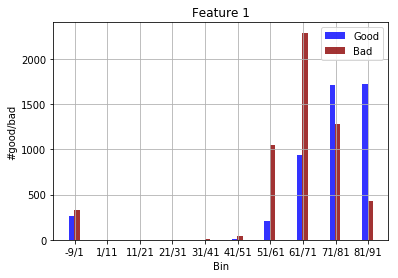

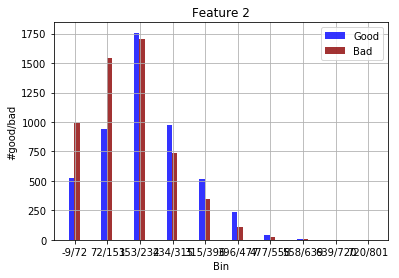

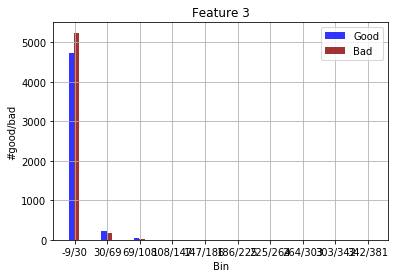

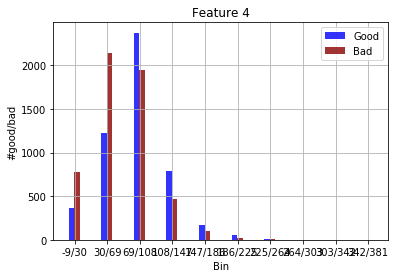

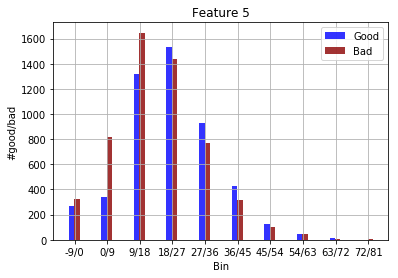

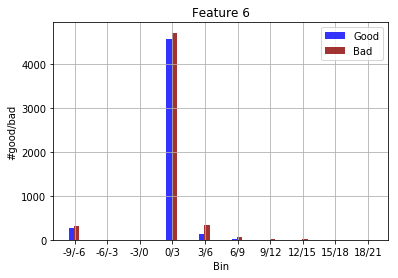

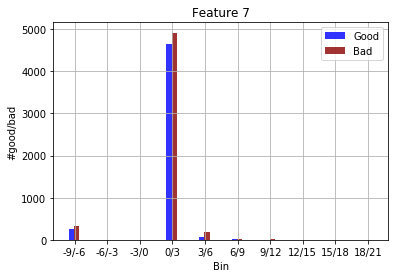

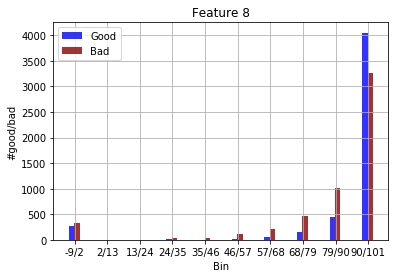

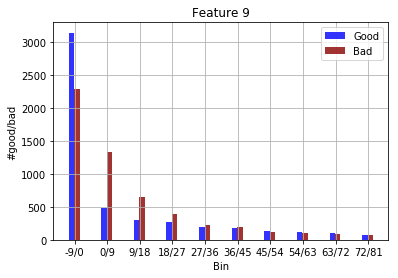

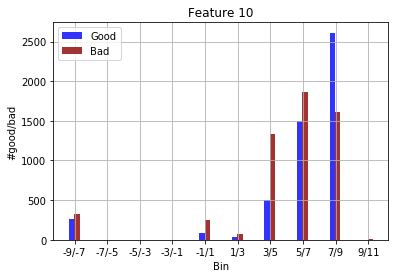

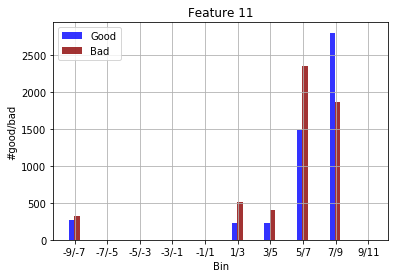

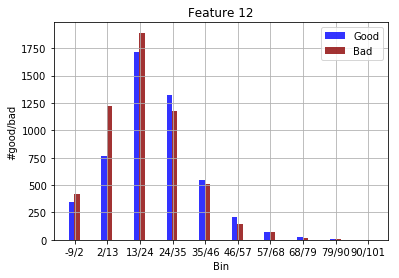

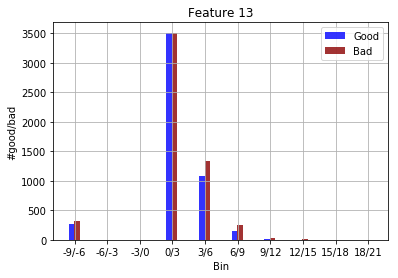

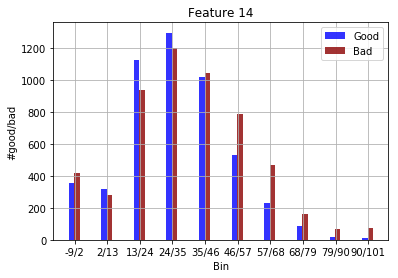

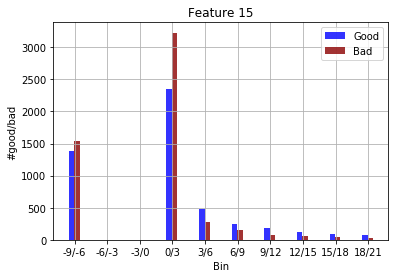

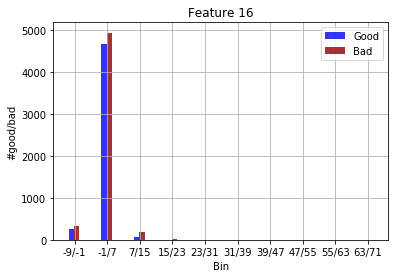

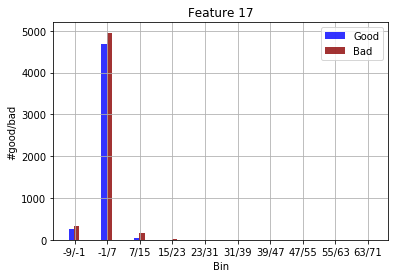

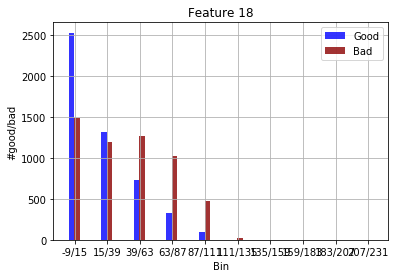

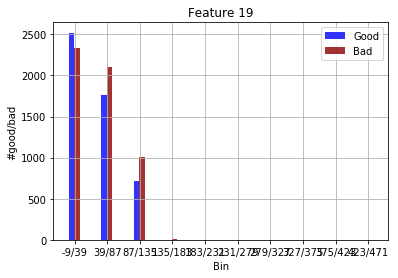

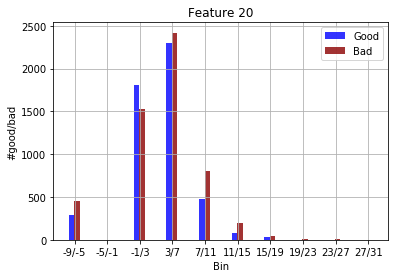

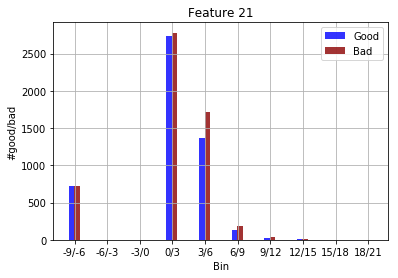

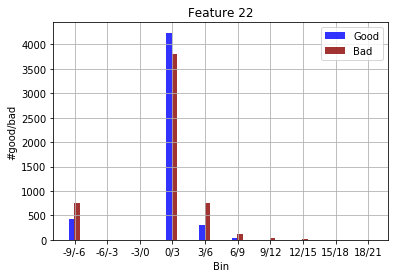

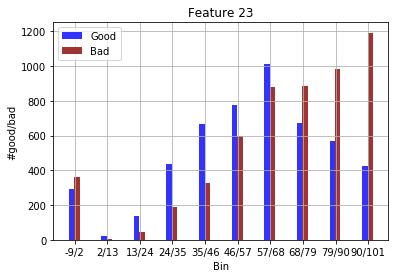

In [78]:
import numpy as np
import matplotlib.pyplot as plt

for i in range(data.shape[0]):
    
    title = "Feature " + str(i+1)
    
    # data to plot
    n_groups = 10
    number_of_good = big_blue[i]
    number_of_bad  = big_red[i]

    # create plot
    fig, ax = plt.subplots()
    index = np.arange(0,30,3)
    bar_width = 0.5
    opacity = 0.8
    bar_spacing = 1

    rects1 = plt.bar(index, number_of_good, bar_width,
                     alpha=opacity,
                     color='b',
                     label='Good')

    rects2 = plt.bar(index + bar_width, number_of_bad, bar_width,
                     alpha=opacity,
                     color='darkred',
                     label='Bad')

    plt.xlabel('Bin')
    plt.ylabel('#good/bad')
    plt.title(title)
    plt.xticks(index + bar_width - .2, big_bins[i])
    plt.grid()
    plt.legend()

#     plt.tight_layout()
    plt.show()